In [68]:
from cv2 import aruco
import cv2
import numpy as np
import os
import csv
import sys
from tqdm import tqdm
from IPython.display import display, Image
import msgpack as mp
import msgpack_numpy as mpn
import matplotlib.pyplot as plt

In [69]:
_webcam_calib_folder = r"C:\Users\CMC\Documents\openposelibs\pose\armbo\recording_programs\test_data\omni_cam_9d0f_may_8_2023\calibration_00"
# _webcam_calib_folder = r"C:\Users\Sujith\Documents\Projects\armbo\recording_programs\test_data\omni_cam_9d0f_may_8_2023\calibration_00"

_webcam_calib_folder = os.path.join(_webcam_calib_folder)
_webcam_calib_pth = os.path.join( _webcam_calib_folder, "webcam_calibration.msgpack")

with open(_webcam_calib_pth, "rb") as f:
    webcam_calib = mp.Unpacker(f, object_hook=mpn.decode)
    _temp = next(webcam_calib)
    _webcam_cam_mat = _temp[0]
    _webcam_dist = _temp[1]
_webcam_video_pth = os.path.join(_webcam_calib_folder, "webcam_color.msgpack")
_webcam_timestamp_pth = os.path.join(_webcam_calib_folder, "webcam_timestamp.msgpack")

with open(os.path.join(_webcam_calib_folder, "webcam_rotmat.msgpack"), "rb") as f:
    webcam_rotmat = mp.Unpacker(f, object_hook=mpn.decode)
    _webcam_rot = next(webcam_rotmat)
    _webcam_org = next(webcam_rotmat)
print("camera matrix", _webcam_cam_mat)
print("distortion", _webcam_dist)

camera matrix [[880.19523452   0.         358.2789884 ]
 [  0.         881.87061144 242.70902376]
 [  0.           0.           1.        ]]
distortion [[ 1.24325941e-01 -1.20330000e-01 -2.99461015e-03 -1.15851300e-03
  -3.99283638e+00]]


In [70]:
ARUCO_PARAMETERS = aruco.DetectorParameters_create()
ARUCO_DICT = aruco.Dictionary_get(aruco.DICT_ARUCO_ORIGINAL)

board = aruco.GridBoard_create(
        markersX=1,
        markersY=1,
        markerLength=0.05,
        markerSeparation=0.01,
        dictionary=ARUCO_DICT)

In [83]:
_folder_name = "sk36_30_forward_slow_00"
_video_pth = os.path.join(os.path.dirname(_webcam_calib_folder), _folder_name, "webcam_color.msgpack")

_video_file = open(_video_pth, "rb")
_video = mp.Unpacker(_video_file, object_hook=mpn.decode)

coord = {"x":[], "y":[], "z":[]}

for frame in _video:
    # gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = frame

    # estimate pose of aruco markers
    corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, ARUCO_DICT, parameters=ARUCO_PARAMETERS)

    # Refine detected markers
    # Eliminates markers not part of our board, adds missing markers to the board
    corners, ids, rejectedImgPoints, recoveredIds = aruco.refineDetectedMarkers(
            image = gray,
            board = board,
            detectedCorners = corners,
            detectedIds = ids,
            rejectedCorners = rejectedImgPoints,
            cameraMatrix = _webcam_cam_mat,
            distCoeffs = _webcam_dist)

    rotation_vectors, translation_vectors, _objPoints = aruco.estimatePoseSingleMarkers(corners, 0.05, _webcam_cam_mat, _webcam_dist)

    if translation_vectors is None:
        coord["x"].append(np.nan)
        coord["y"].append(np.nan)
        coord["z"].append(np.nan)
    else:
        coord["x"].append(translation_vectors[0][0][0])
        coord["y"].append(translation_vectors[0][0][1])
        coord["z"].append(translation_vectors[0][0][2])

    try:
        rotation_vectors = np.array(rotation_vectors[0][0]).reshape(1, 3)
        translation_vectors = np.array(translation_vectors[0][0]).reshape(1, 3)

        # display the frame
        i = aruco.drawDetectedMarkers(gray, corners, ids)
        i = cv2.drawFrameAxes(i, _webcam_cam_mat, _webcam_dist, rotation_vectors, translation_vectors, 0.05)
    except:
        pass

    cv2.imshow("frame", i)
    cv2.waitKey(1)

cv2.destroyAllWindows()

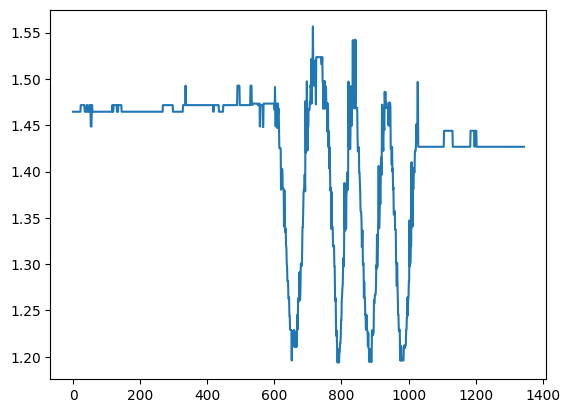

In [85]:
plt.plot(coord["z"], label="x")

In [77]:
vals = coord

ids = []

for idx, val in enumerate(coord["z"]):
    if idx == 0:
        continue
    else:
        if abs(coord["z"][idx] - coord["z"][idx-1]) > 0.1:
            coord["z"][idx] = np.nan
            ids.append(idx)
        try:
            if abs(coord["z"][idx] - coord["z"][idx+1]) > 0.1:
                coord["z"][idx] = np.nan
                ids.append(idx)
        except:
            pass

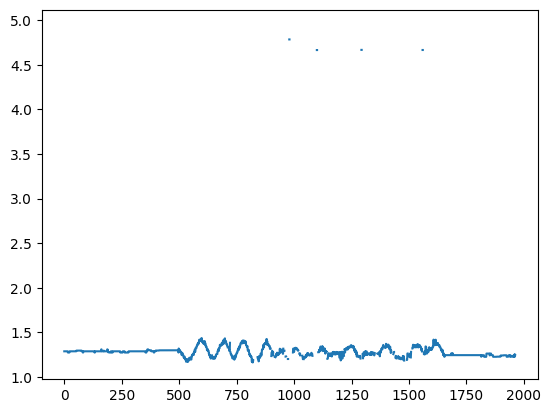

In [75]:
plt.plot(coord["z"], label="x")

In [74]:
ids

[661,
 662,
 712,
 714,
 722,
 793,
 794,
 833,
 837,
 838,
 840,
 913,
 914,
 956,
 961,
 962,
 969,
 970,
 971,
 972,
 984,
 985,
 1019,
 1020,
 1033,
 1035,
 1085,
 1091,
 1093,
 1143,
 1144,
 1155,
 1190,
 1276,
 1277,
 1278,
 1279,
 1292,
 1355,
 1486,
 1487,
 1489,
 1490,
 1506,
 1507,
 1558,
 1564]